In [1]:
import numpy as np
import pandas as pd

In [2]:
initialData = pd.read_csv(r"C:\Users\Eric\Documents\EECS 731\Proj6\Data\artificialWithAnomaly\artificialWithAnomaly\art_daily_jumpsup.csv")
initialData

,timestamp,value
0,2014-04-01 00:00:00,19.761252
1,2014-04-01 00:05:00,20.500833
2,2014-04-01 00:10:00,19.961641
3,2014-04-01 00:15:00,21.490266
4,2014-04-01 00:20:00,20.187739
...,...,...
4027,2014-04-14 23:35:00,18.074649
4028,2014-04-14 23:40:00,21.002014
4029,2014-04-14 23:45:00,20.566713
4030,2014-04-14 23:50:00,18.254193


In [3]:
initialData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [4]:
#Change timestamp from object to datetime
initialData['timestamp'] = pd.to_datetime(initialData['timestamp'], errors='coerce')

In [5]:
initialData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  4032 non-null   datetime64[ns]
 1   value      4032 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 63.1 KB


In [6]:
initialData['timestamp'] = pd.to_datetime(initialData['timestamp'])

In [7]:
initialData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  4032 non-null   datetime64[ns]
 1   value      4032 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 63.1 KB


In [8]:
initialData

,timestamp,value
0,2014-04-01 00:00:00,19.761252
1,2014-04-01 00:05:00,20.500833
2,2014-04-01 00:10:00,19.961641
3,2014-04-01 00:15:00,21.490266
4,2014-04-01 00:20:00,20.187739
...,...,...
4027,2014-04-14 23:35:00,18.074649
4028,2014-04-14 23:40:00,21.002014
4029,2014-04-14 23:45:00,20.566713
4030,2014-04-14 23:50:00,18.254193


In [9]:
initialData['timestamp'] = initialData['timestamp'].values.astype(float)
initialData

,timestamp,value
0,1.396310e+18,19.761252
1,1.396311e+18,20.500833
2,1.396311e+18,19.961641
3,1.396311e+18,21.490266
4,1.396312e+18,20.187739
...,...,...
4027,1.397518e+18,18.074649
4028,1.397519e+18,21.002014
4029,1.397519e+18,20.566713
4030,1.397519e+18,18.254193


In [10]:
initialData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   float64
 1   value      4032 non-null   float64
dtypes: float64(2)
memory usage: 63.1 KB


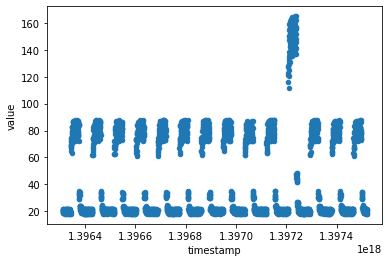

In [11]:
initialData.plot.scatter(x='timestamp', y='value')

In [12]:
#Building a naive bayes Gaussian model
#Using: https://heartbeat.fritz.ai/naive-bayes-classifier-in-python-using-scikit-learn-13c4deb83bcf
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Data pre-processing
#We’re going to predict y using x as an independent variable.
#Note that the test size of 0.25 indicates we’ve used 25% of the data for testing. 
#random_state ensures reproducibility
x = initialData.drop('value',axis=1)
y = initialData['value']
y=y.astype('str')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [14]:
y

0       19.761251902999998
1             20.500833287
2            19.9616414445
3            21.4902660734
4            20.1877394098
               ...        
4027         18.0746492248
4028         21.0020136323
4029         20.5667131193
4030    18.254192669200002
4031         21.8631471547
Name: value, Length: 4032, dtype: object

In [15]:
x_test

,timestamp
1138,1.396652e+18
657,1.396508e+18
670,1.396511e+18
2800,1.397150e+18
1988,1.396907e+18
...,...
1743,1.396833e+18
2571,1.397082e+18
3516,1.397365e+18
3432,1.397340e+18


In [16]:
y_test

1138         22.0004994407
657          21.3299120001
670     20.568054338699998
2800         80.7254887454
1988         18.6101986317
               ...        
1743         21.3242137636
2571         18.8797948253
3516         18.0885566518
3432         21.3122413989
596     21.650410086999997
Name: value, Length: 1008, dtype: object

In [17]:
#Train the model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [18]:
y_pred = model.predict(x_test)
y_pred.size

1008

In [19]:
accuracy = accuracy_score(y_test, y_pred)*100
accuracy

0.0

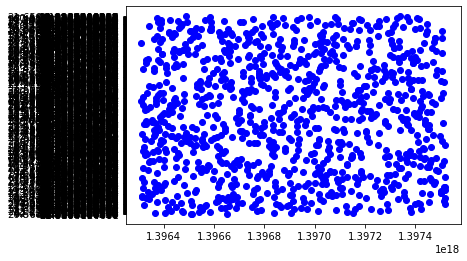

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test,  color='blue')
#plt.plot(x_test, y_pred, color='red', linewidth=2)